# Classification automatique

In [2]:
# import des données

import pandas as pd
import numpy as np
import seaborn as sn
import time
import matplotlib.pyplot as plt

heart_attack = pd.read_csv("Heart Attack Data Set.csv")
heart_attack

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = heart_attack.drop(columns=["target"])
y = heart_attack["target"]


## Régression logistique

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


Train Accuracy:  0.8679245283018868
Accuracy:  0.8131868131868132


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

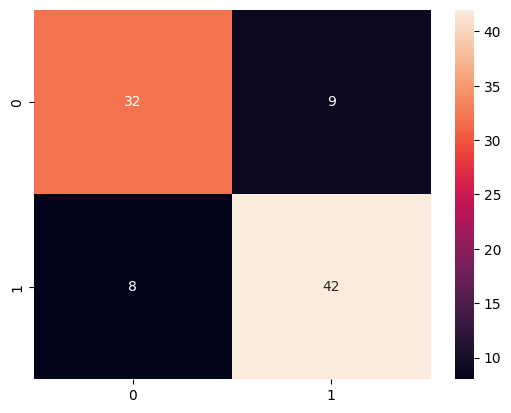

In [5]:
y_test_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_test_pred)
sn.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)

### Régression logistique quadratique

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

log_reg_poly = LogisticRegression()
log_reg_poly.fit(X_train_poly, y_train)

y_test_pred_poly = log_reg_poly.predict(X_test_poly)
y_train_pred = log_reg_poly.predict(X_train_poly)
# Confusion matrix
confusion_matrix(y_test, y_test_pred_poly)

# Accuracy
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Accuracy: ", accuracy_score(y_test, y_test_pred_poly))

Accuracy:  0.8679245283018868
Accuracy:  0.7912087912087912


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN

Meilleur nombre de voisins:  12
Meilleur score:  0.6601092896174864


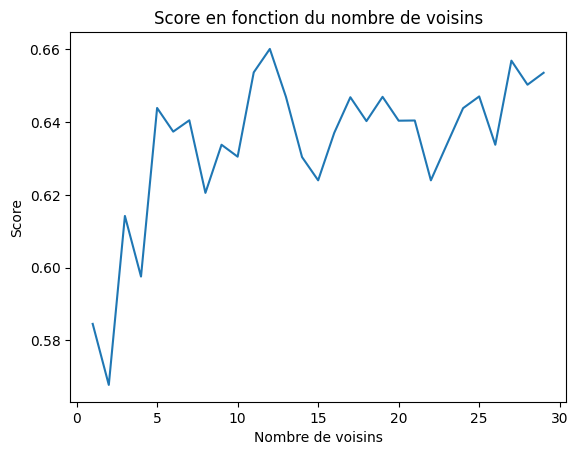

In [7]:
# Grid Search du meilleur nombre de voisins

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors": range(1, 30)
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

print("Meilleur nombre de voisins: ", grid_search.best_params_["n_neighbors"])
print("Meilleur score: ", grid_search.best_score_)

# Affichage du score en fonction du nombre de voisins

scores = grid_search.cv_results_["mean_test_score"]
plt.plot(range(1, 30), scores)
plt.xlabel("Nombre de voisins")
plt.ylabel("Score")
plt.title("Score en fonction du nombre de voisins")
plt.show()

In [8]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_["n_neighbors"])
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.6593406593406593


array([[27, 14],
       [17, 33]], dtype=int64)

### Arbre de décision

In [9]:
# Arbre de décision

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.7692307692307693


array([[32,  9],
       [12, 38]], dtype=int64)

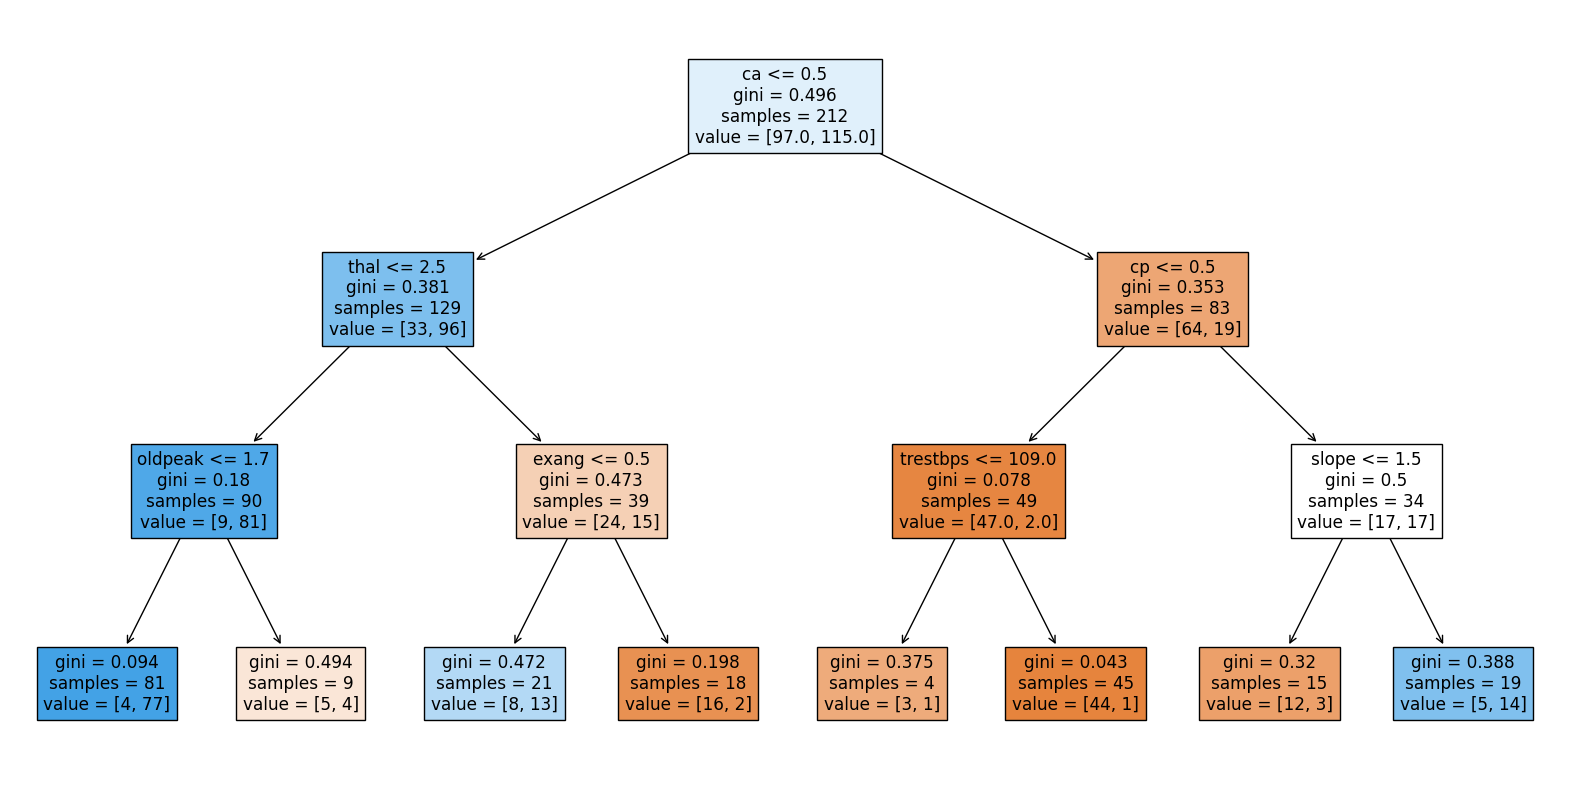

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=heart_attack.columns[:-1])
plt.show()

## RandomForestClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7912087912087912


<Axes: >

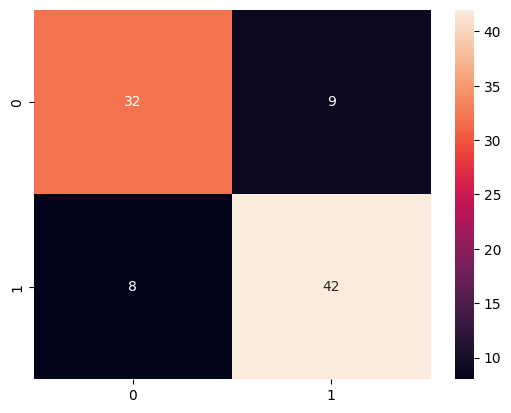

In [12]:
# Matrice de confusion

sn.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
